In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

Feature Engineering

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

In [8]:
data = pd.read_csv("../data/train.csv")
# X_train.drop(columns=['Id'],inplace=True)
X_train, X_test = train_test_split(data,test_size=0.2,random_state=42)
outlayers = [r for r in X_train.index if X_train.loc[r, 'SalePrice'] > 350000]
print(len(outlayers))
X_train.drop(outlayers, inplace=True)
Y_train = X_train['SalePrice']
X_train.drop(columns=['Id','MSZoning', 'Street', 'LandContour', 'Utilities','LandSlope', 'Condition1' ,'Condition2', 'RoofMatl', 'GarageQual', 'GarageCond', 'Heating', 'Electrical', 'Functional', 'PavedDrive', 'SaleType'],inplace=True)
X_train.drop(columns=['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],inplace=True)

43


In [9]:
cat_values = [c for c in X_train.columns if X_train[c].dtype == 'object']
num_values = [c for c in X_train.columns if X_train[c].dtype != 'object']
print(len(cat_values))
print(len(num_values))

28
29


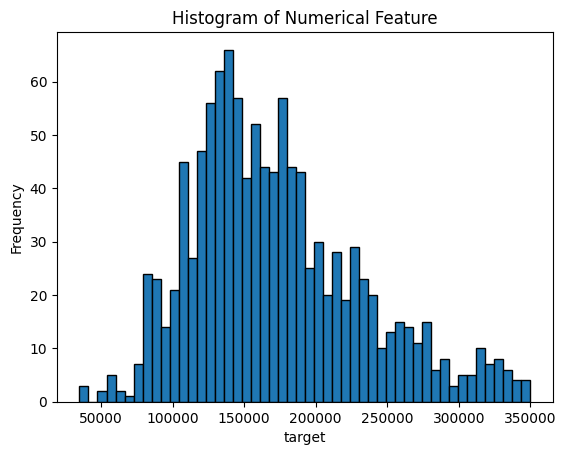

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# for c in cat_values:
    # Using matplotlib

plt.hist(Y_train, bins=50, edgecolor='black')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Feature')
plt.show()

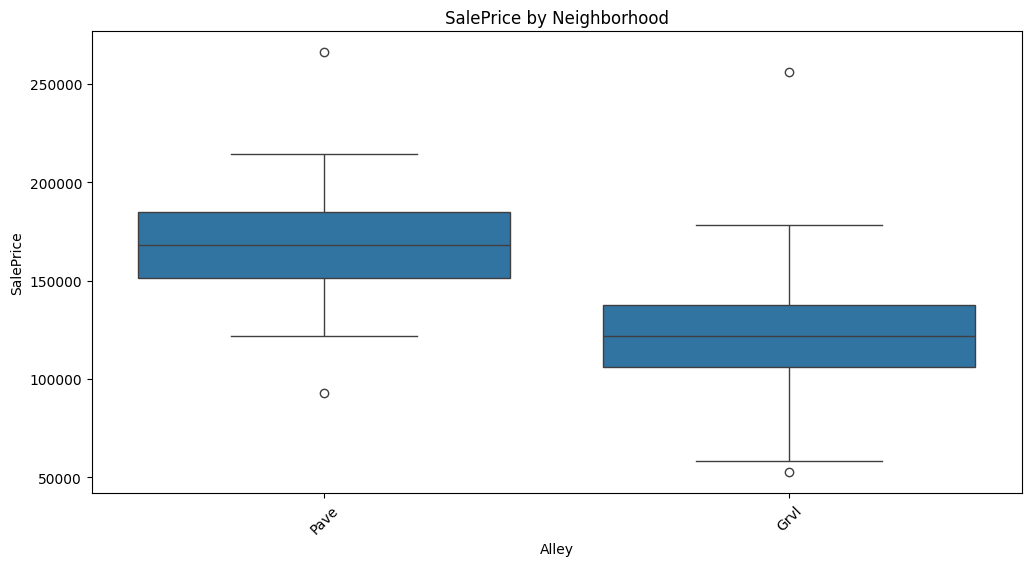

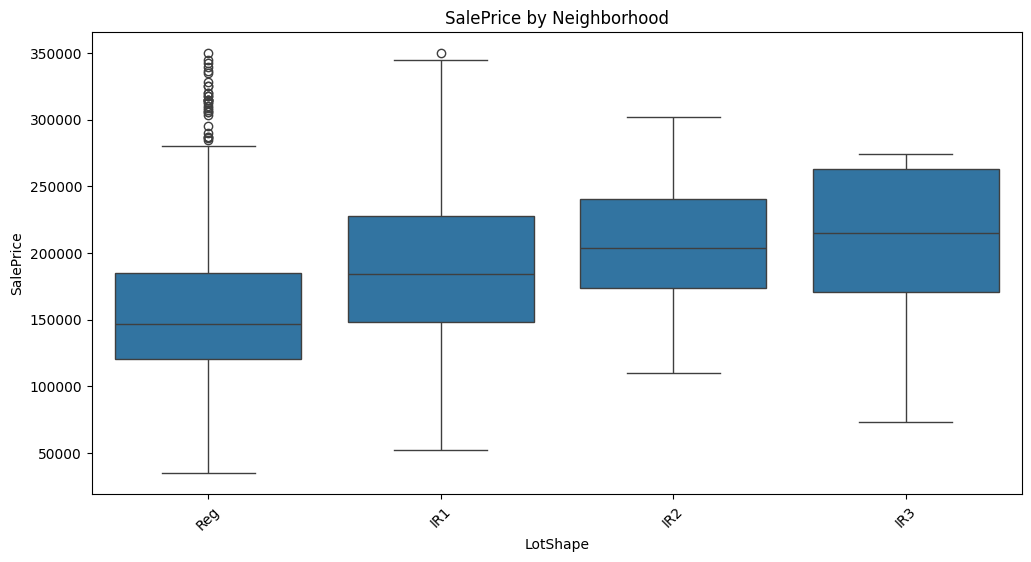

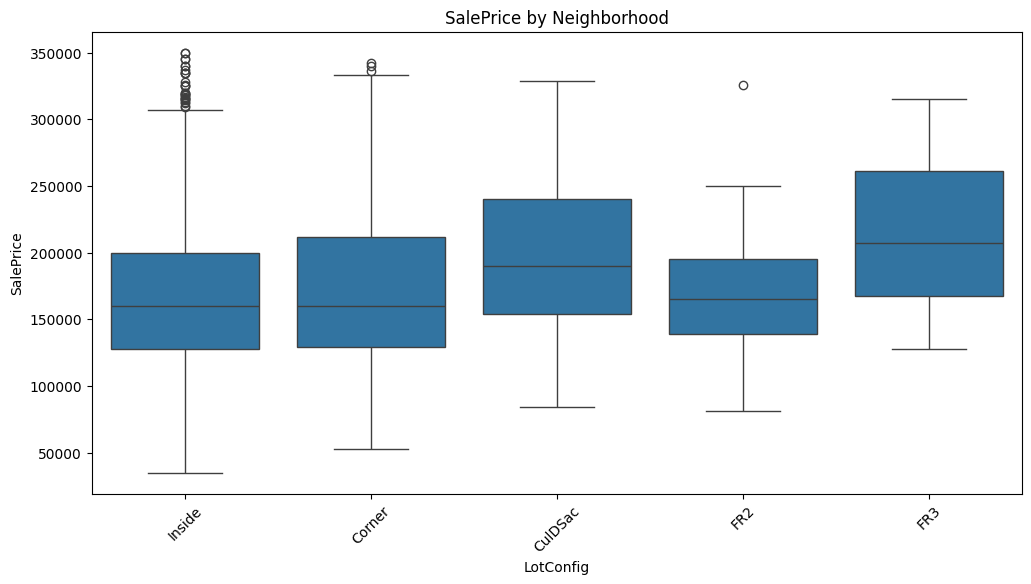

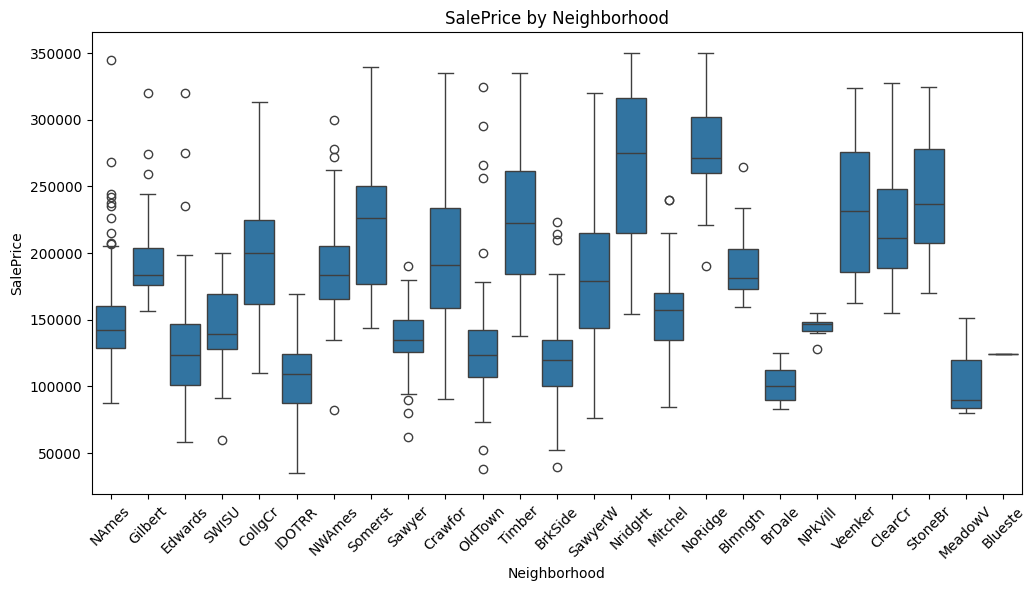

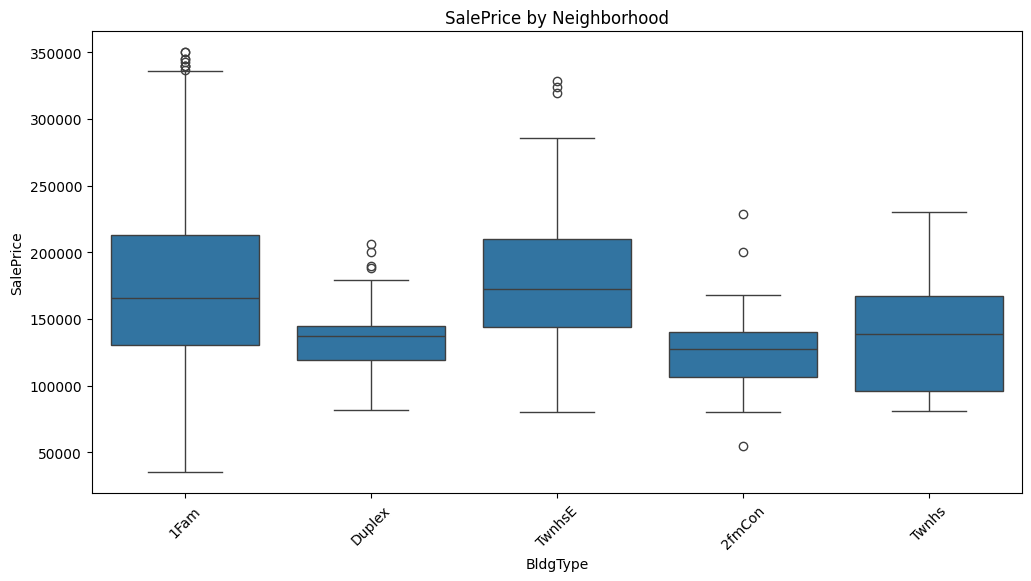

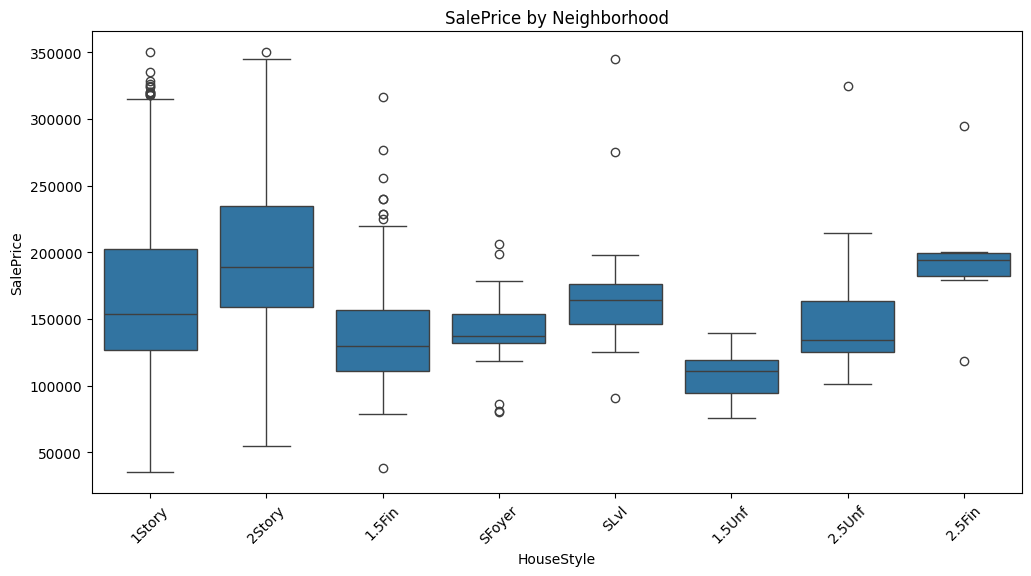

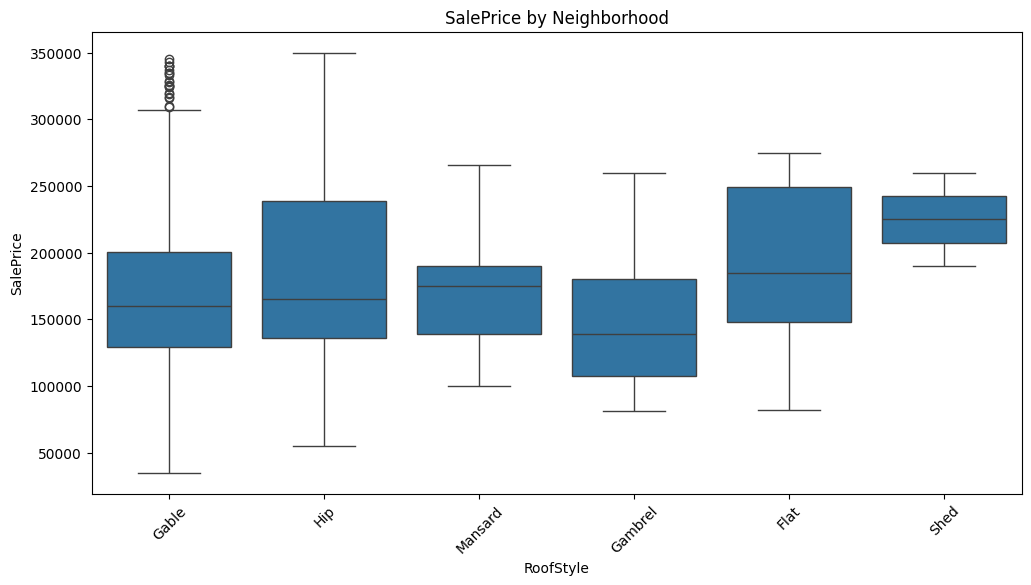

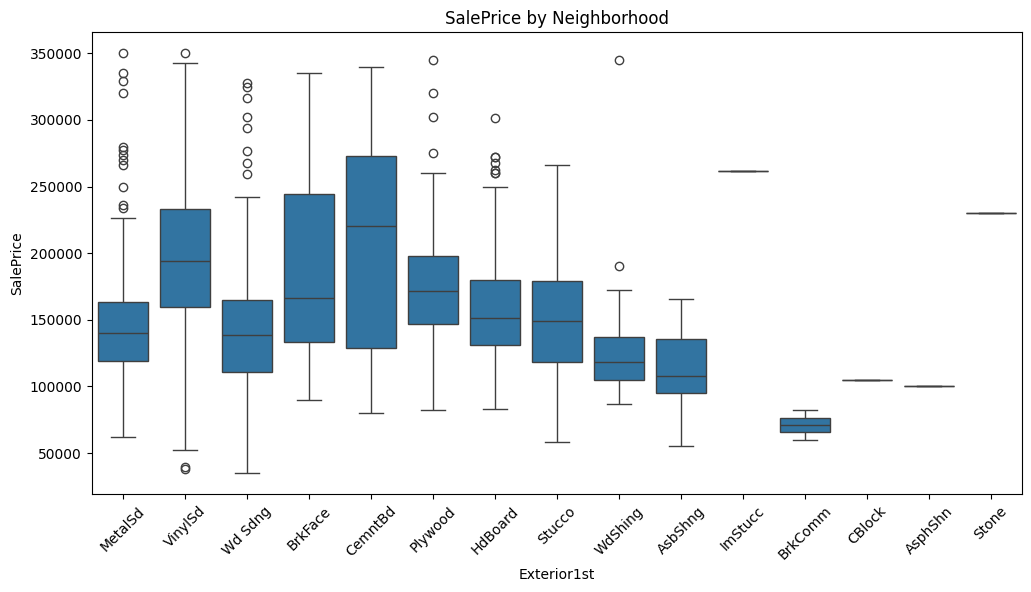

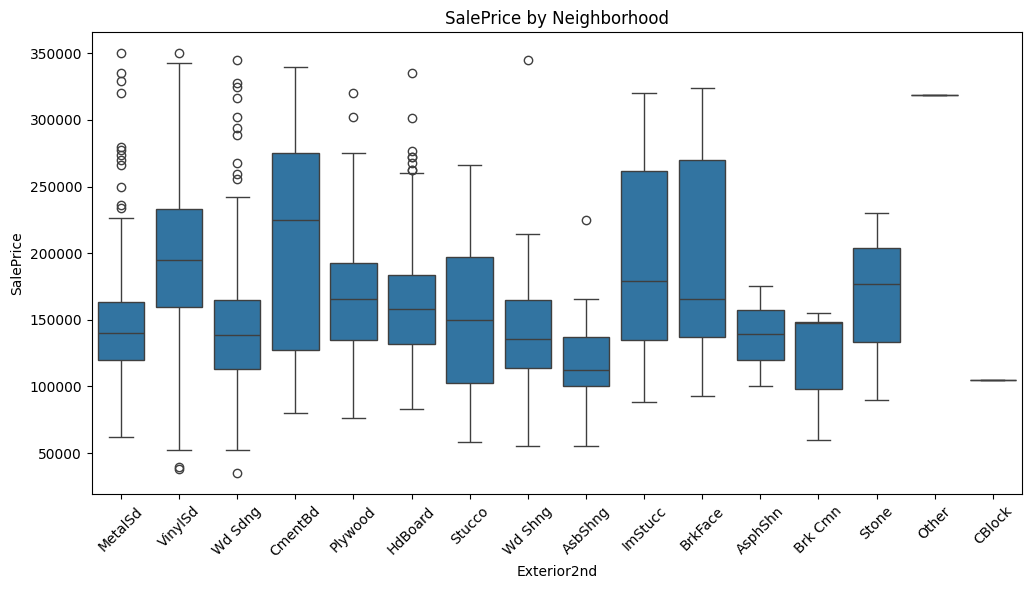

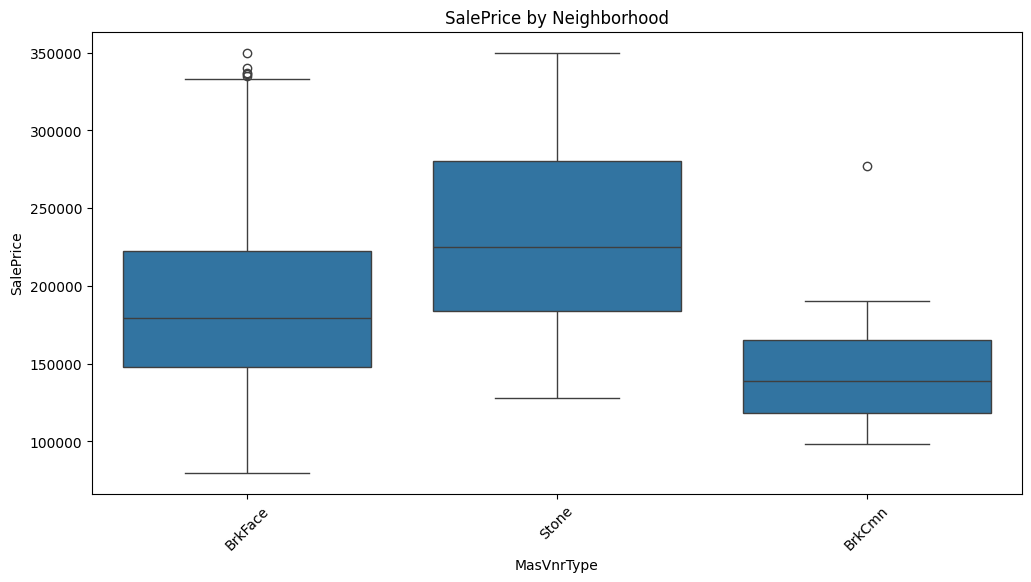

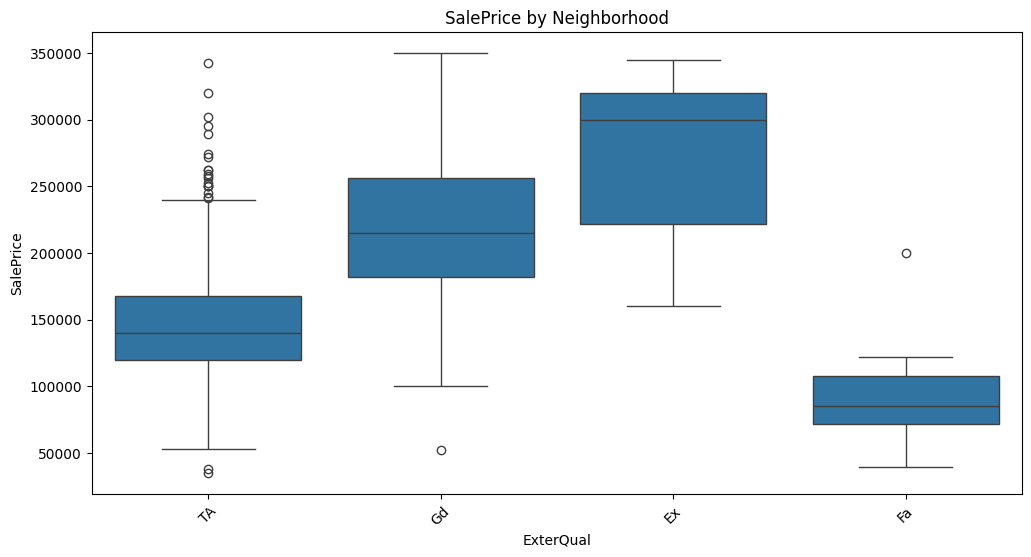

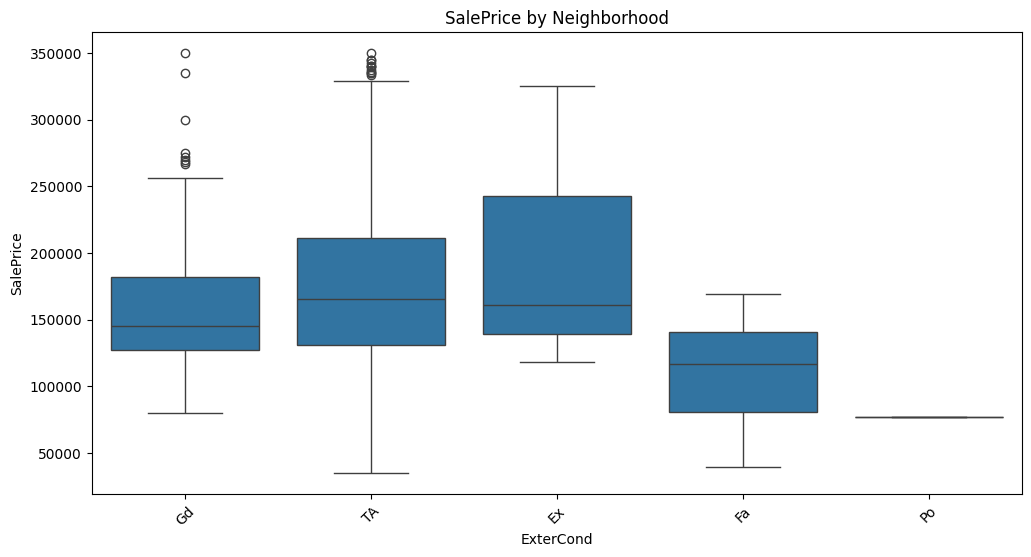

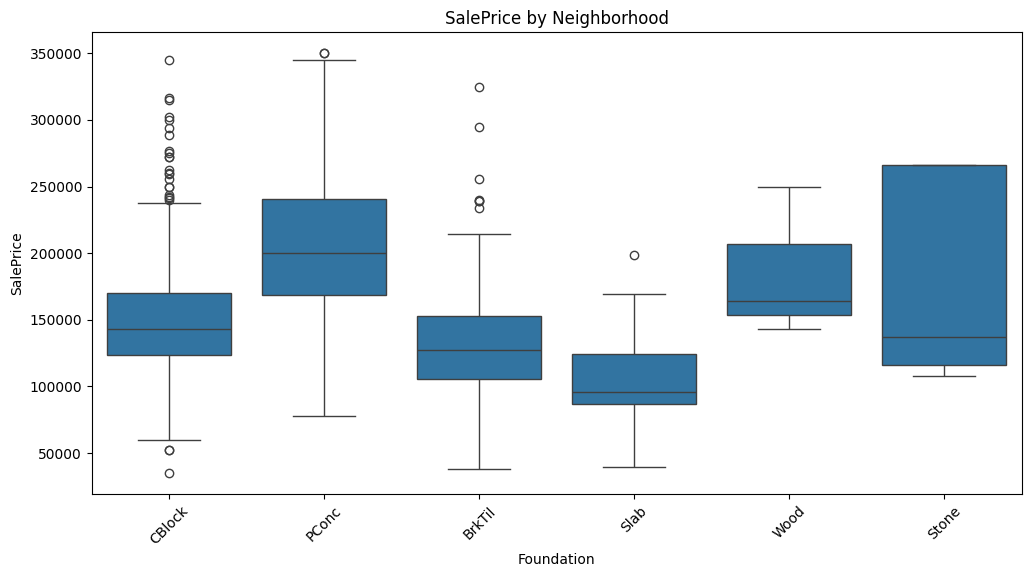

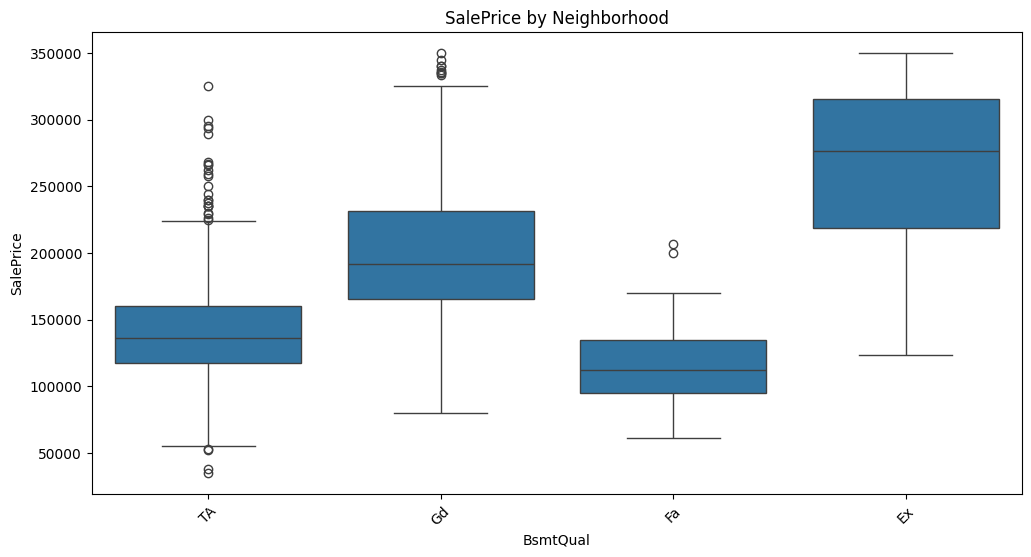

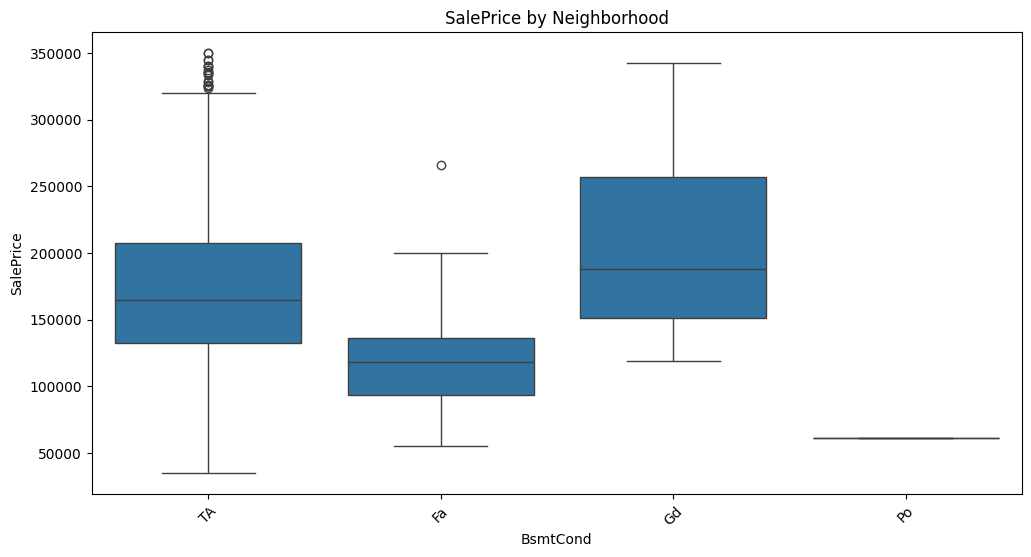

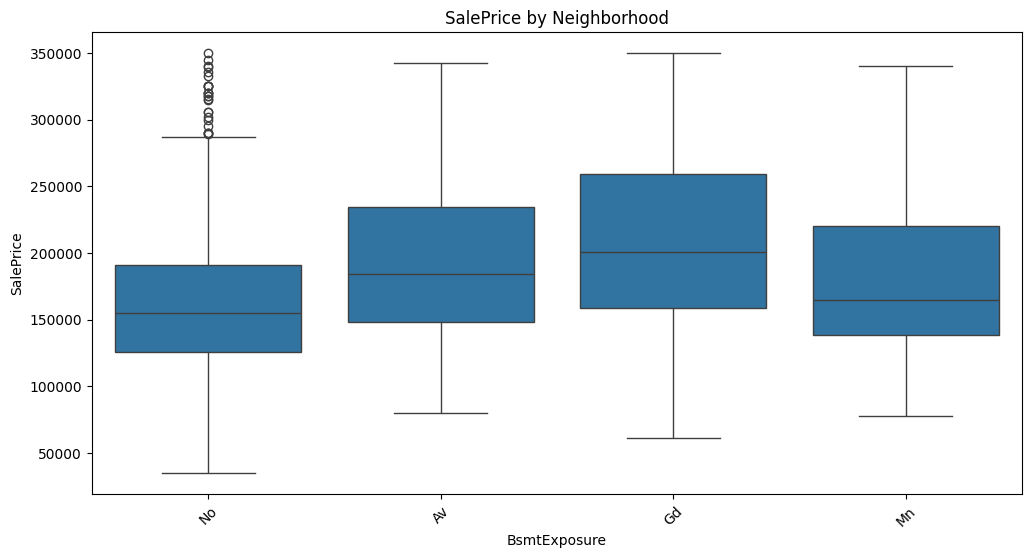

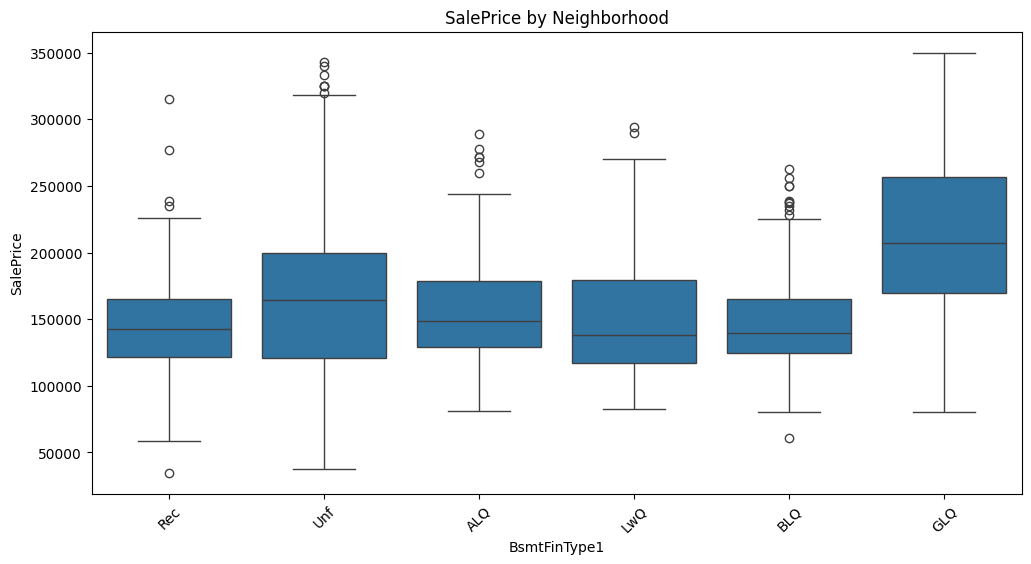

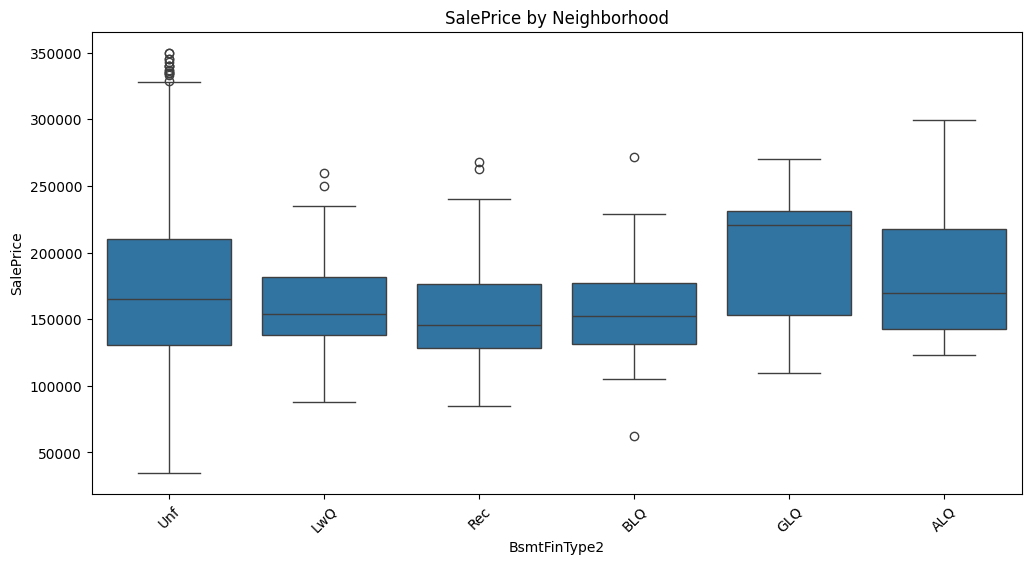

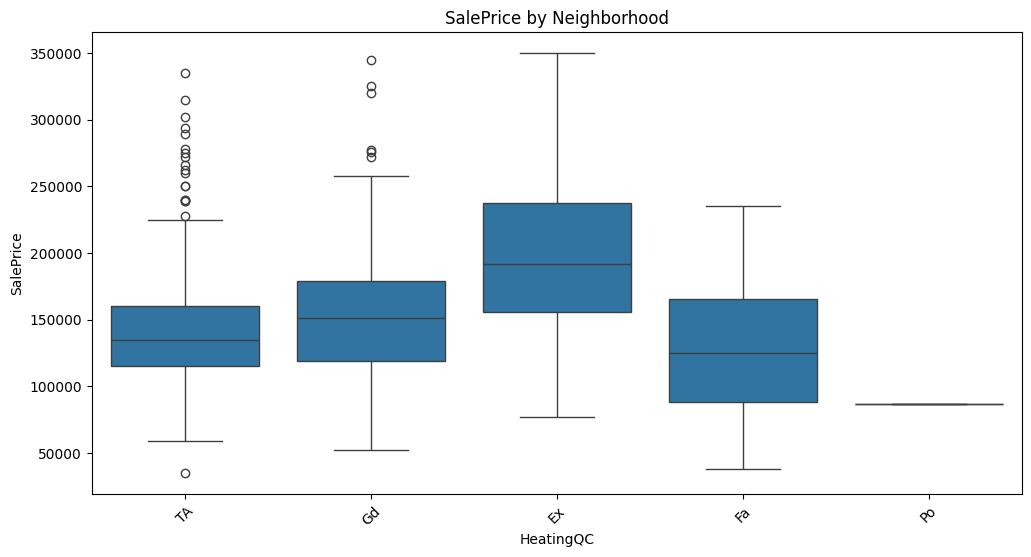

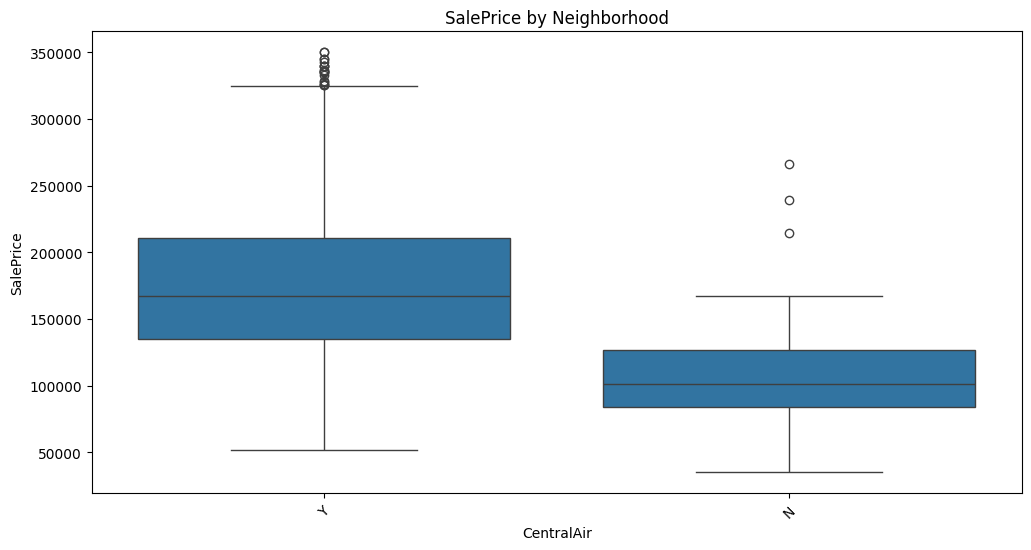

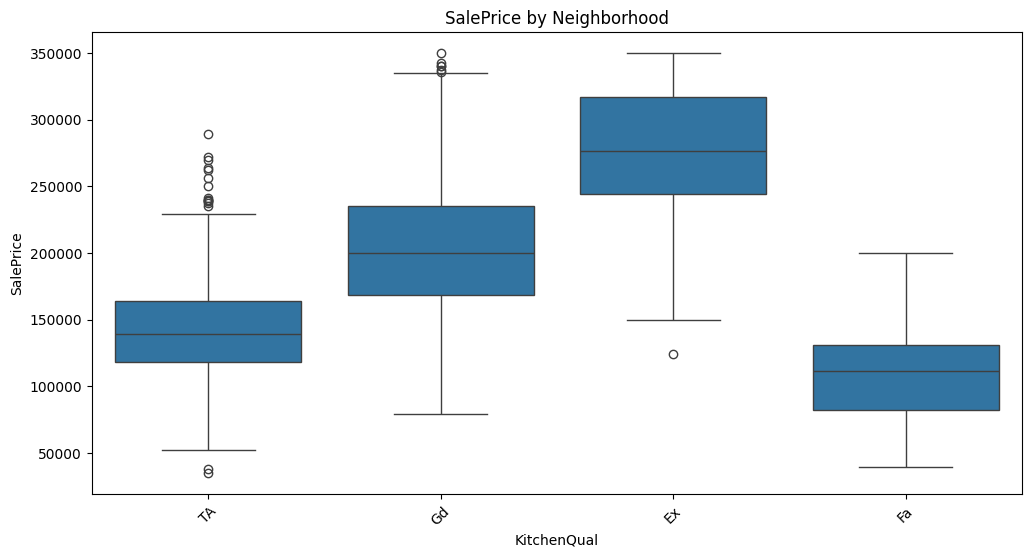

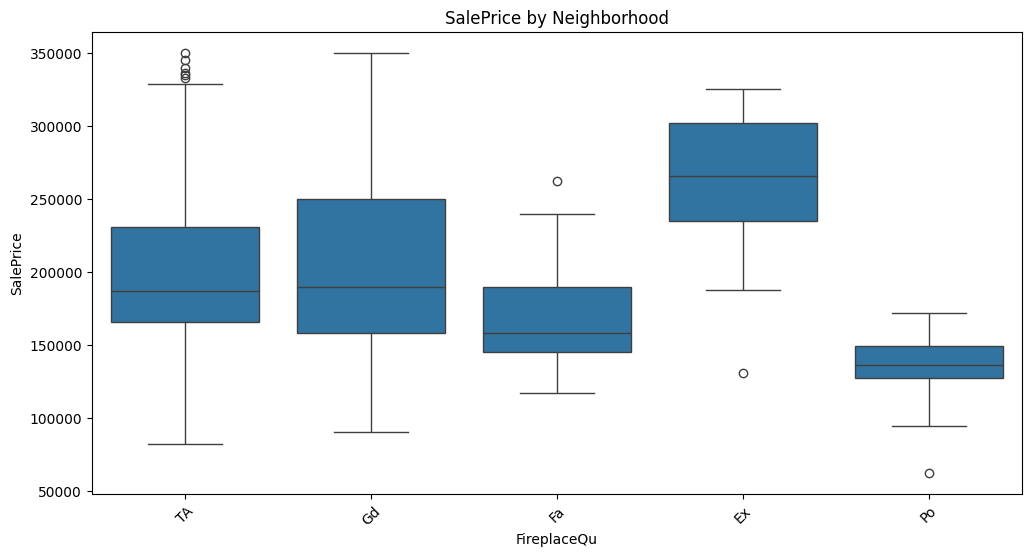

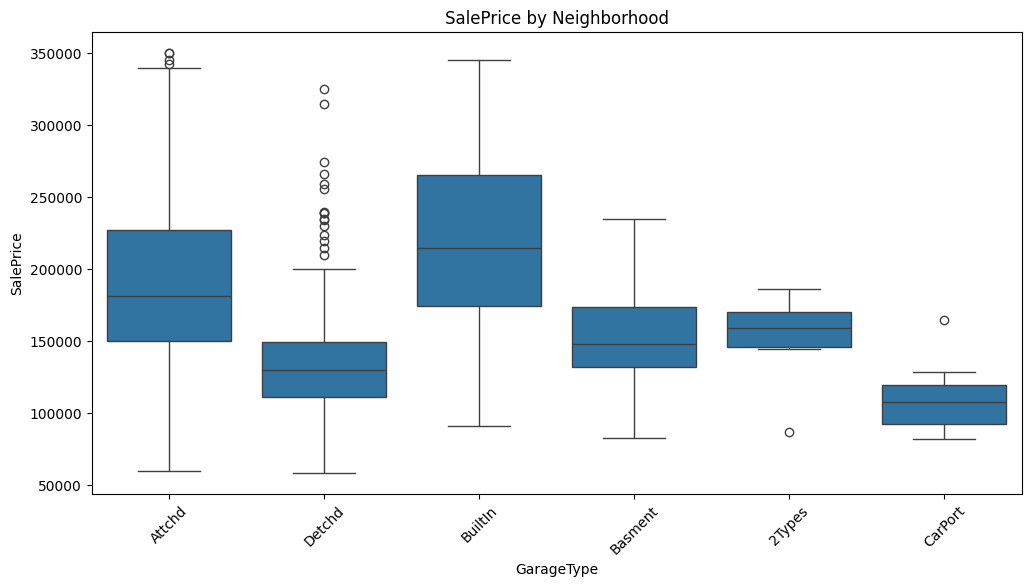

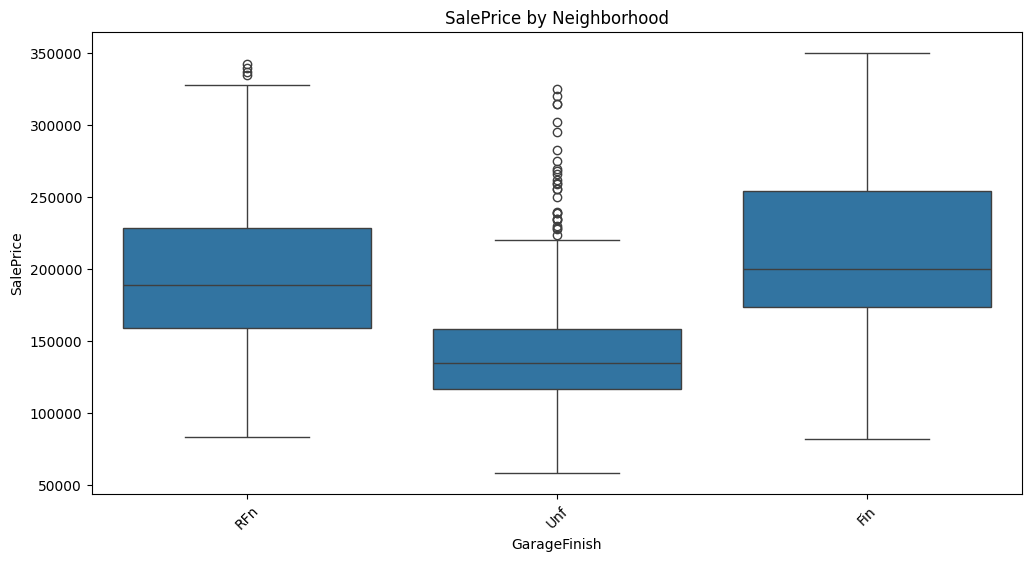

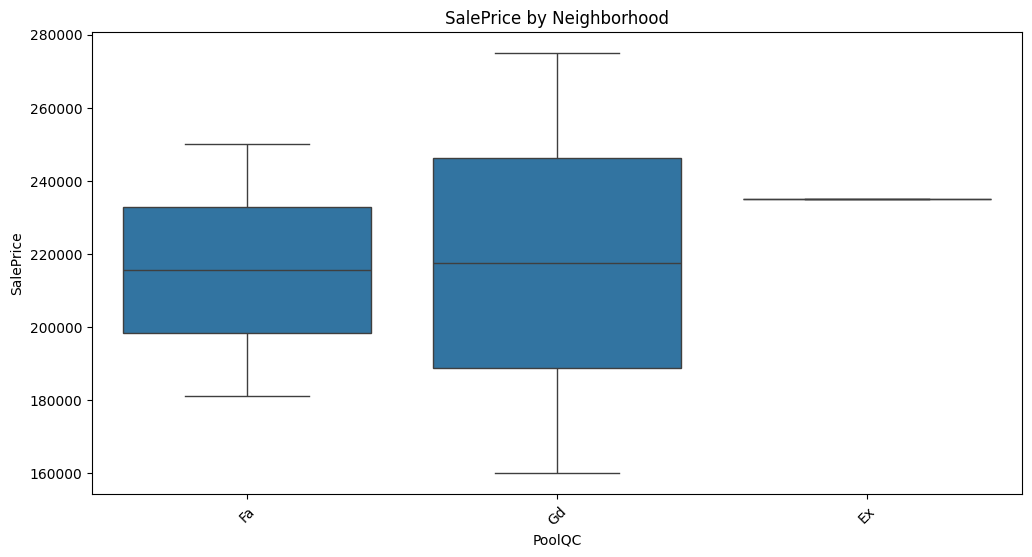

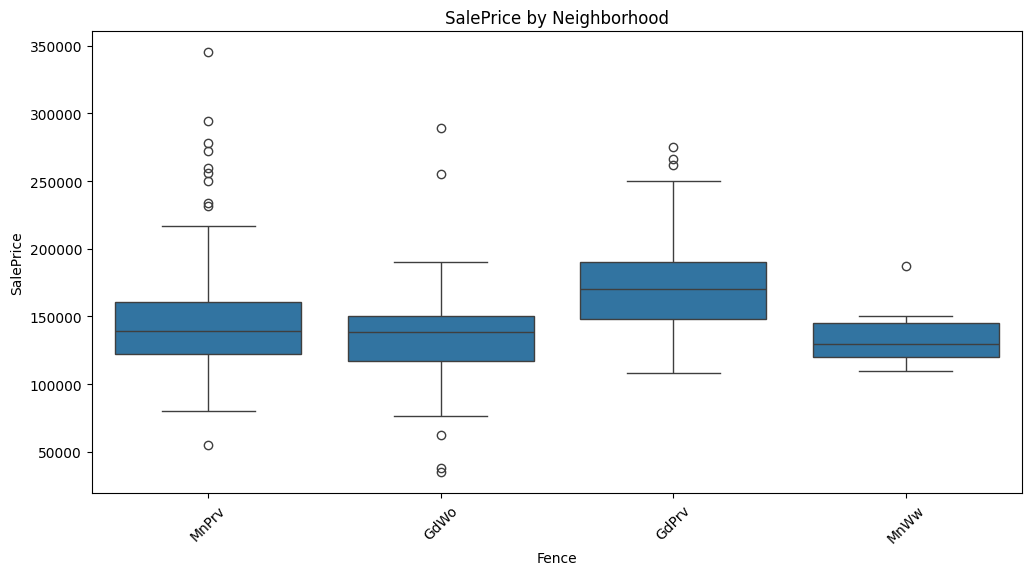

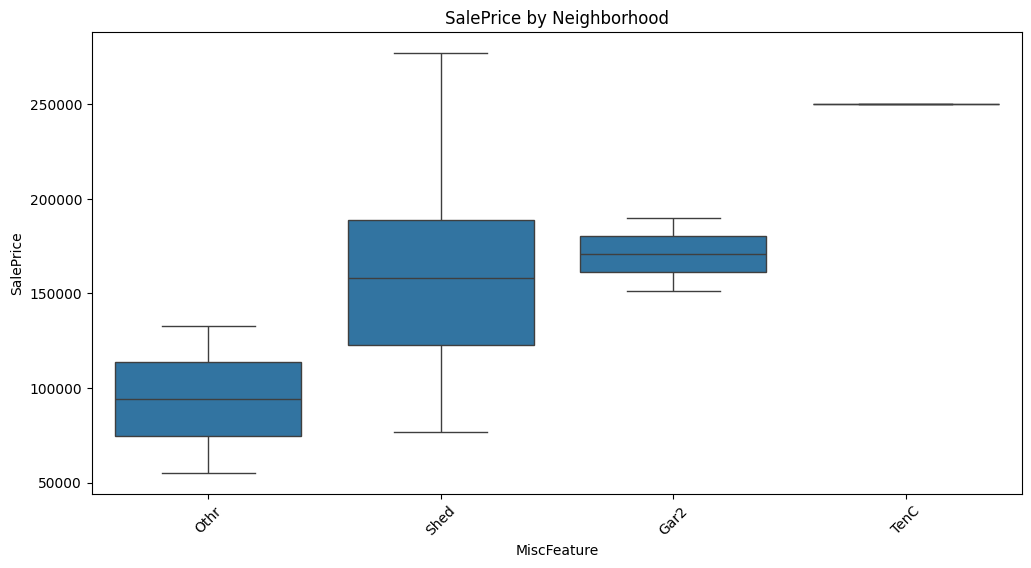

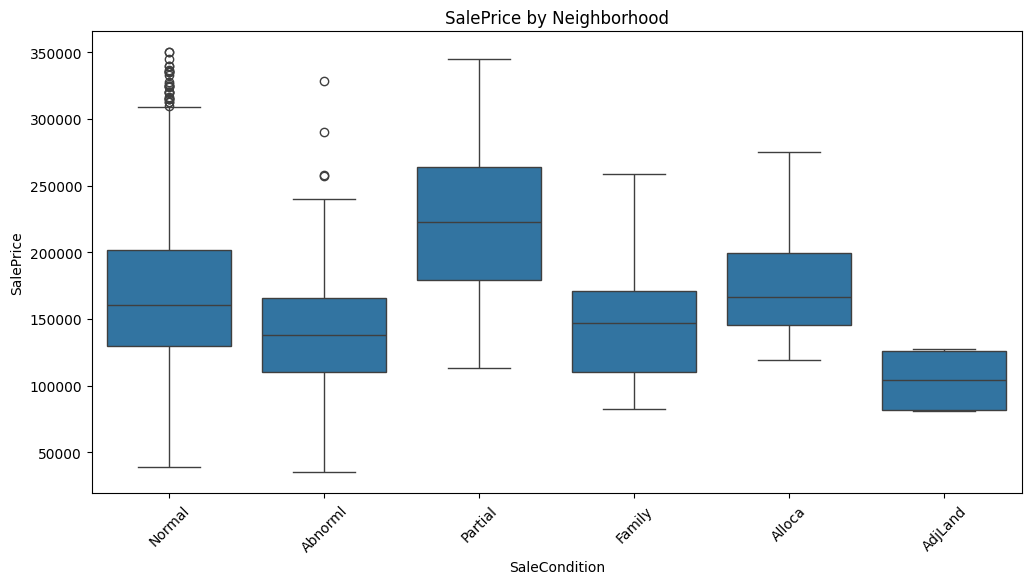

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

for c in cat_values:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=c, y='SalePrice', data=X_train)
    plt.xticks(rotation=45)
    plt.title("SalePrice by Neighborhood")
    plt.show()


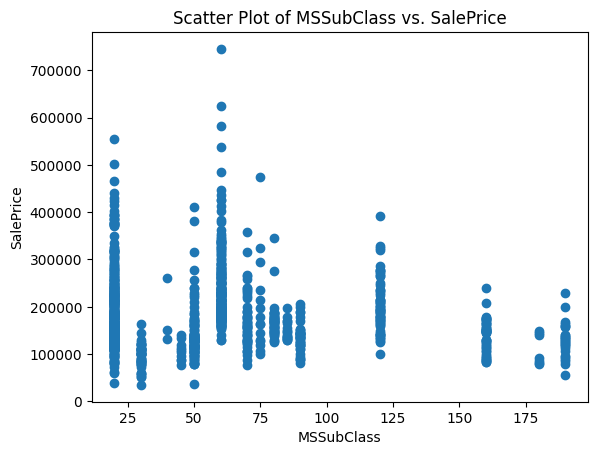

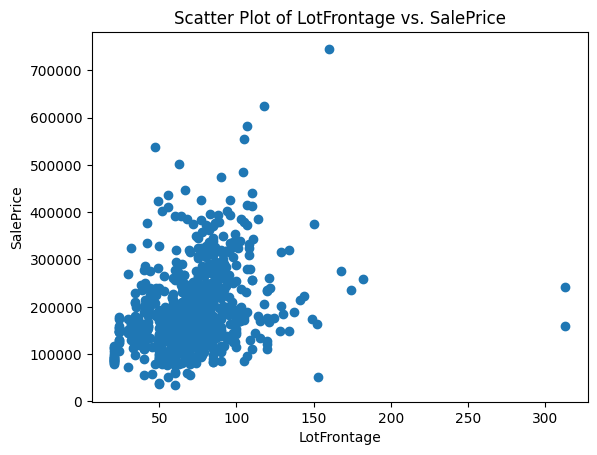

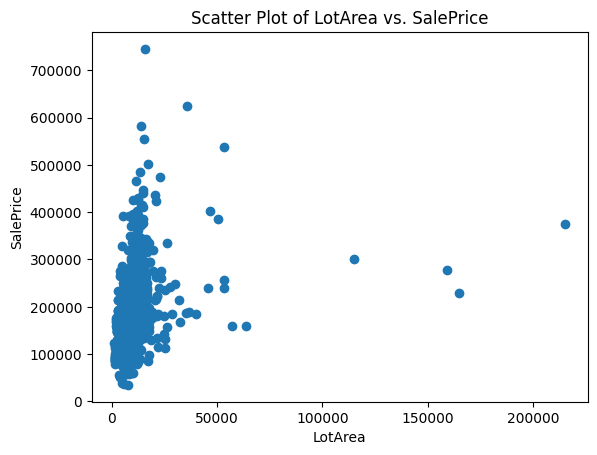

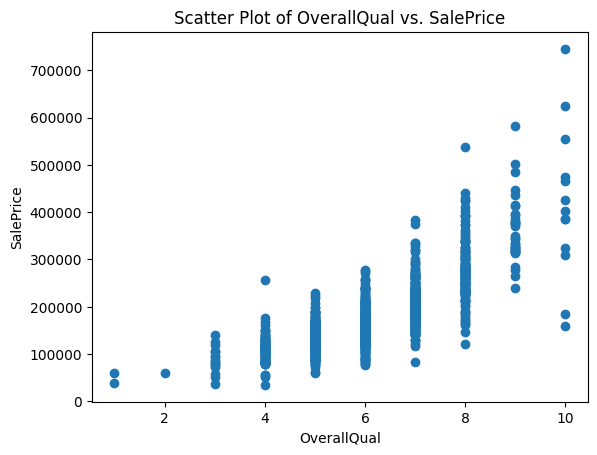

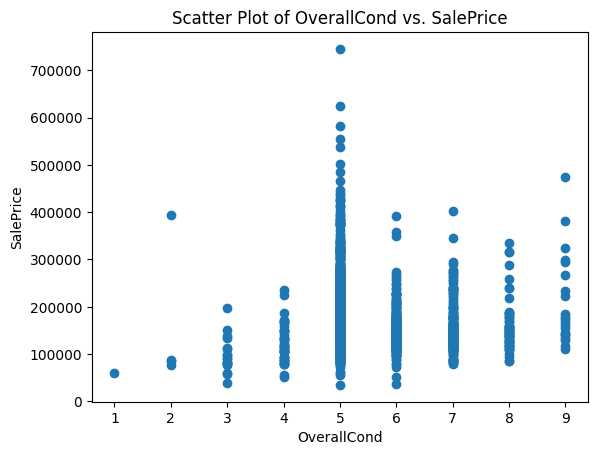

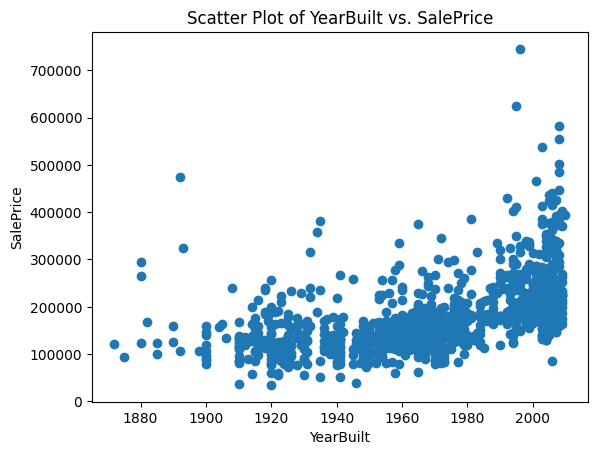

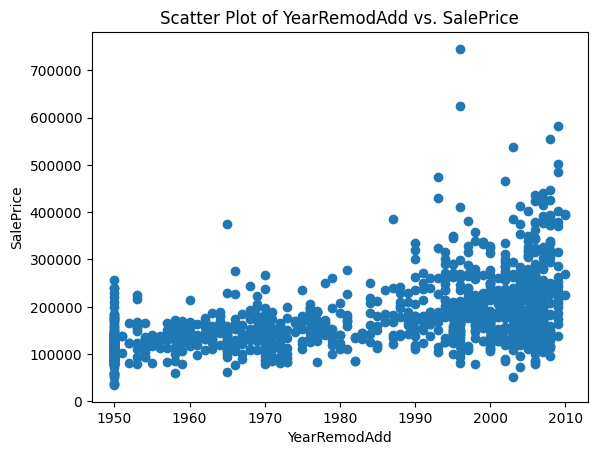

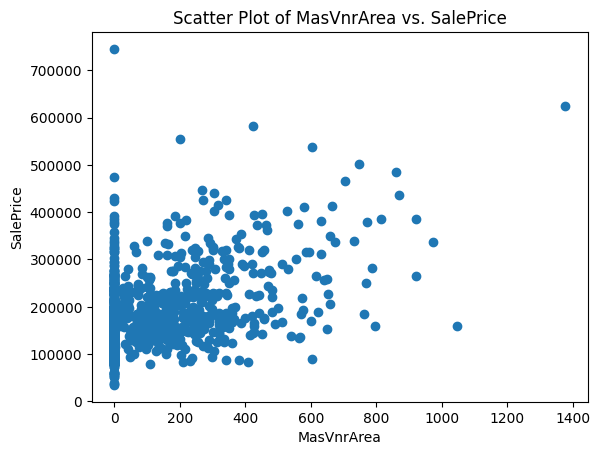

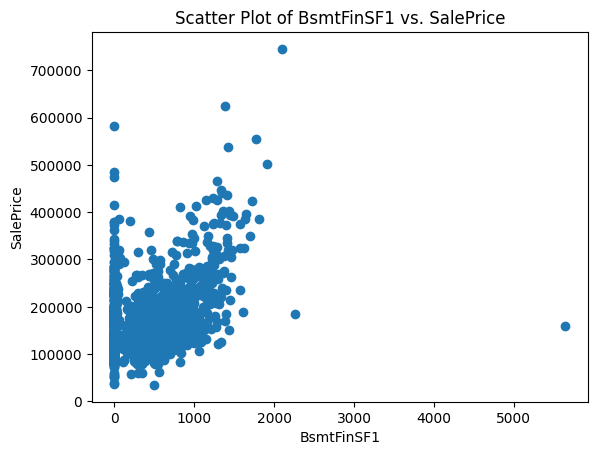

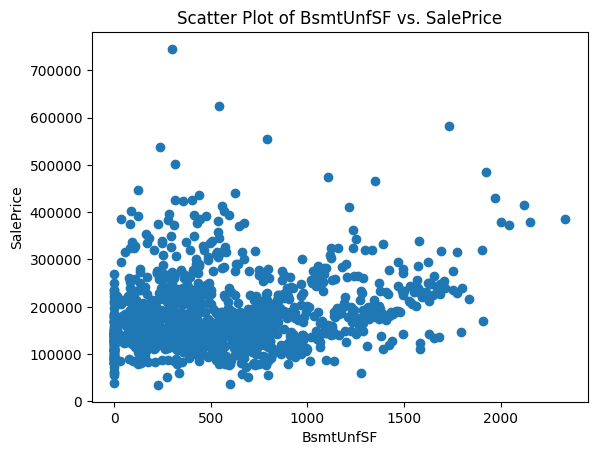

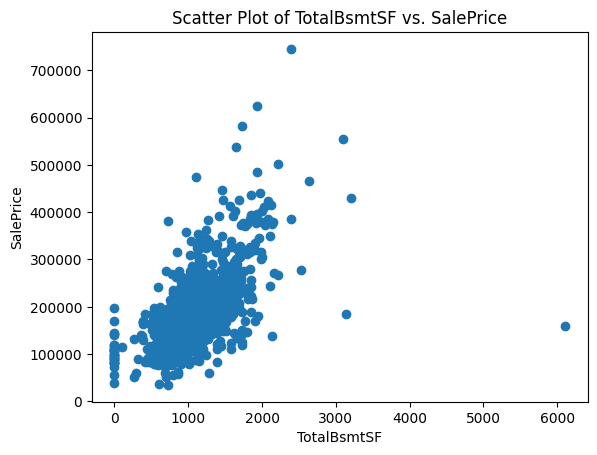

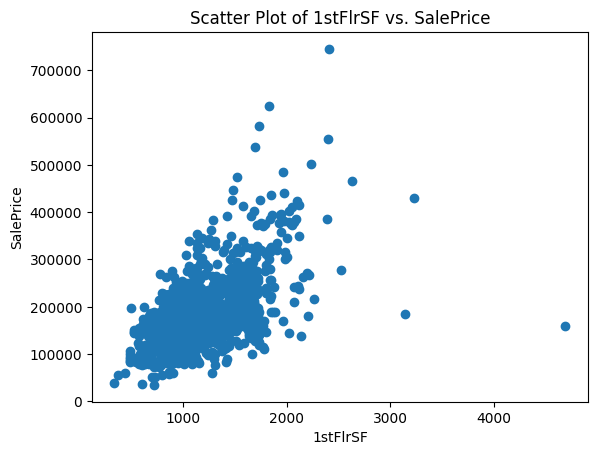

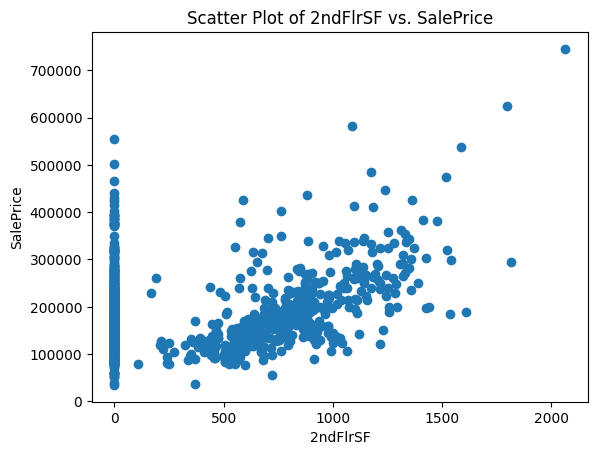

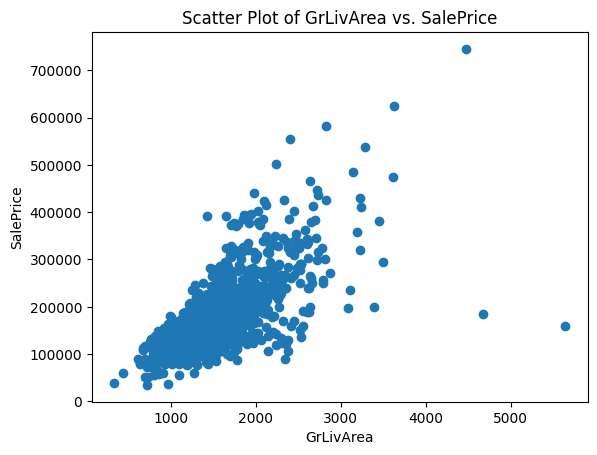

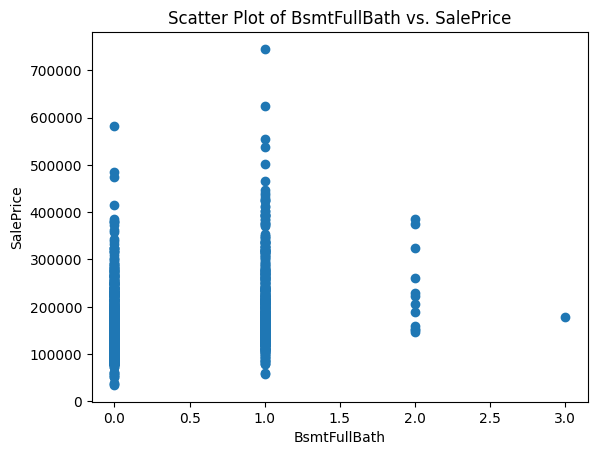

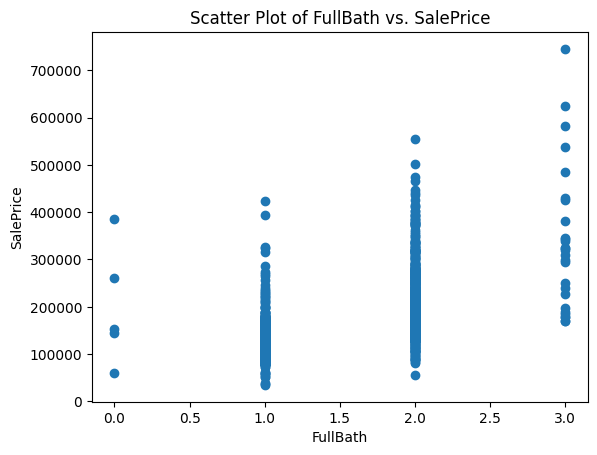

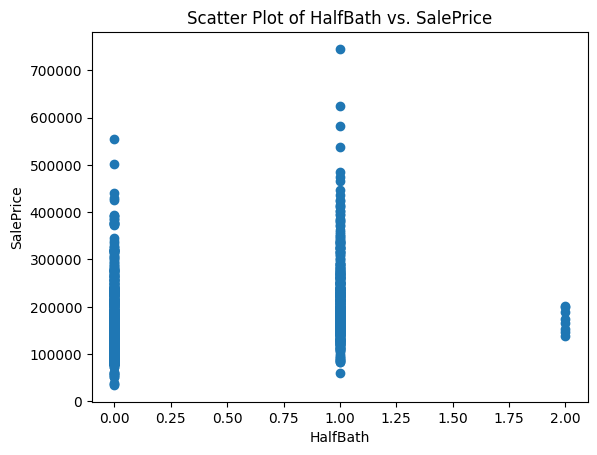

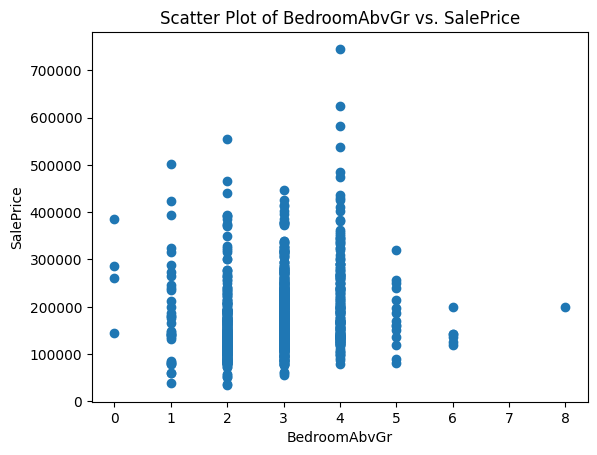

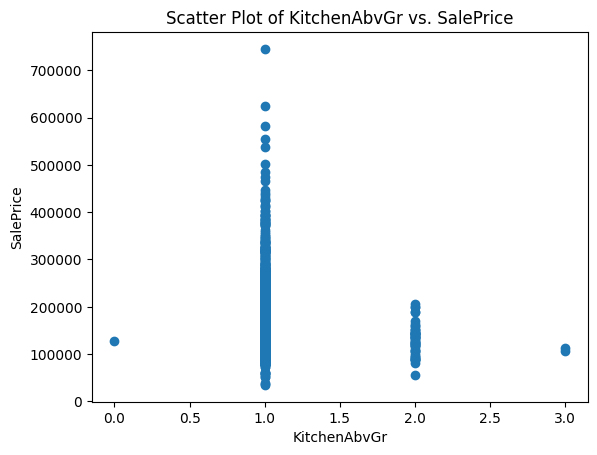

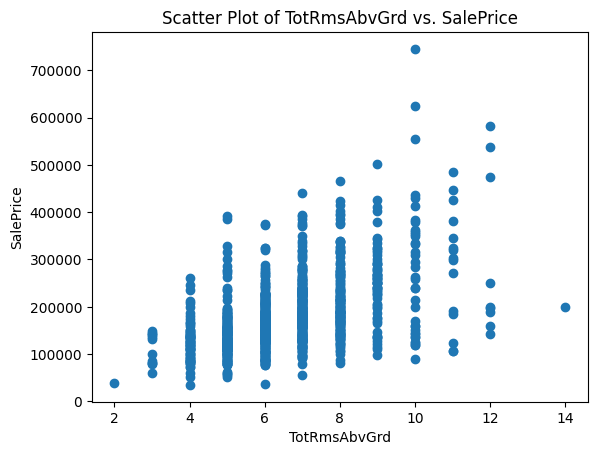

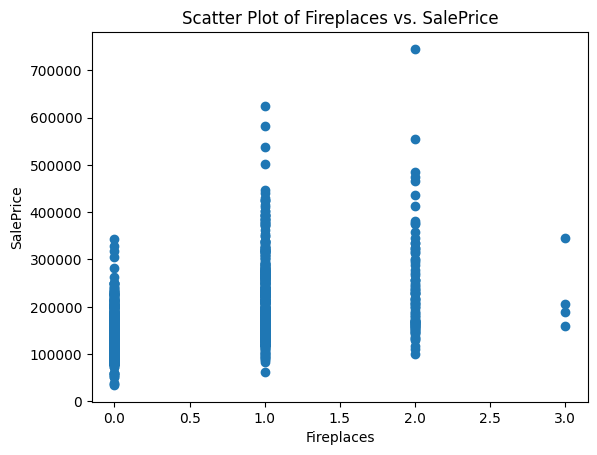

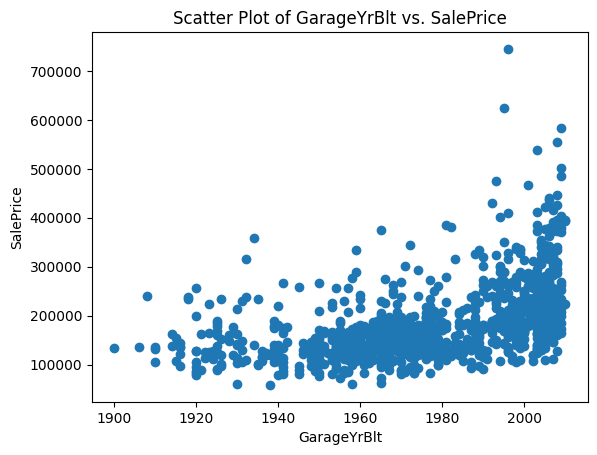

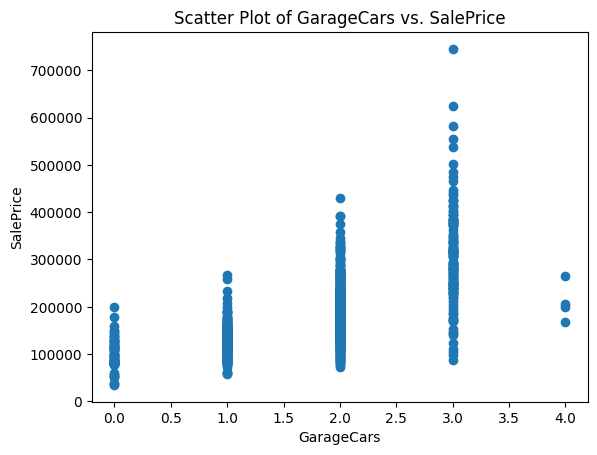

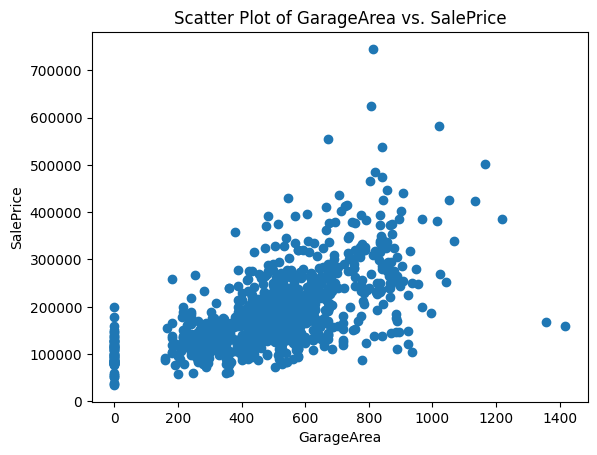

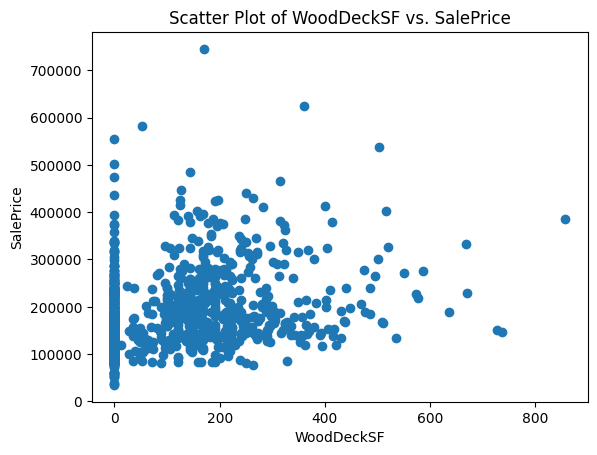

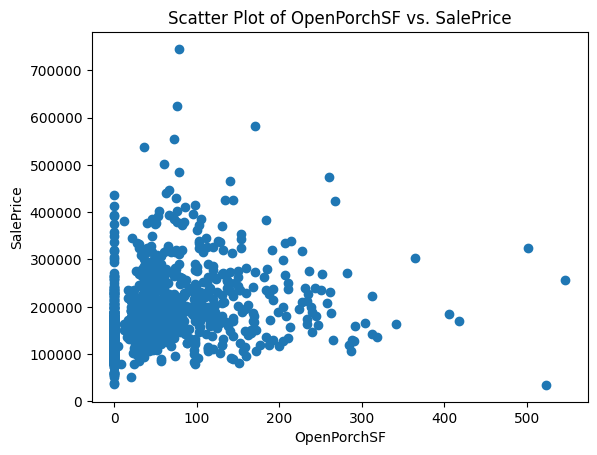

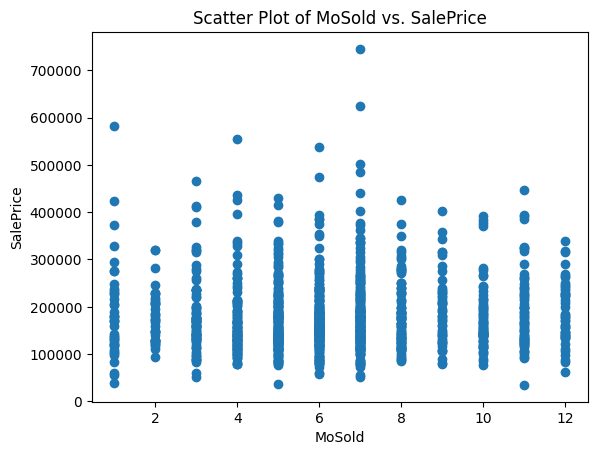

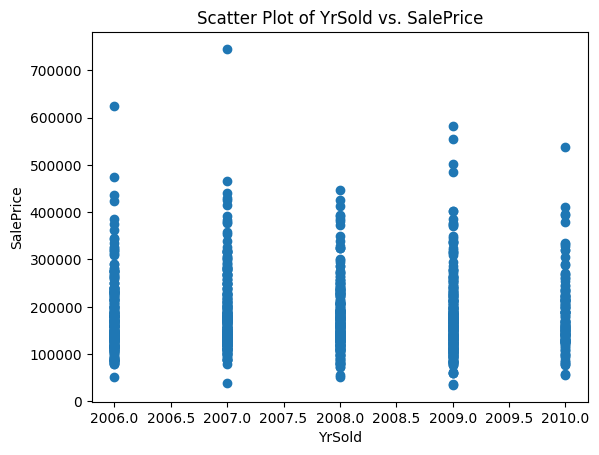

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for c in num_values:
    plt.scatter(X_train[c], Y_train)
    plt.xlabel(c)
    plt.ylabel("SalePrice")
    plt.title(f"Scatter Plot of {c} vs. SalePrice")
    plt.show()